In [1]:
import numpy as np
import pandas as pd

data = pd.read_excel('./2_5301182359977087197.xlsx')
df = data.copy()

In [2]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df = df.drop('customer_id', axis=1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   country           10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   products_number   10000 non-null  int64  
 7   credit_card       10000 non-null  int64  
 8   active_member     10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


## Datada null dəyərlər yoxdur

In [5]:
df.isnull().sum()

credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [6]:
df['country'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: country, dtype: int64

In [7]:
df.describe()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


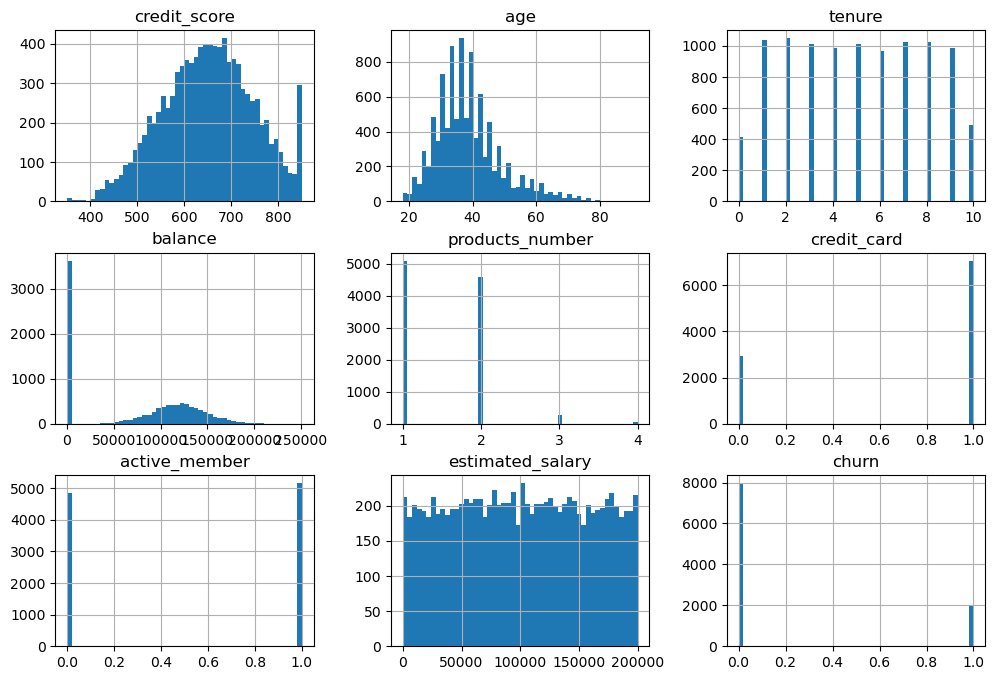

In [8]:
import matplotlib.pyplot as plt

df.hist(bins=50, figsize=(12, 8))
plt.show()

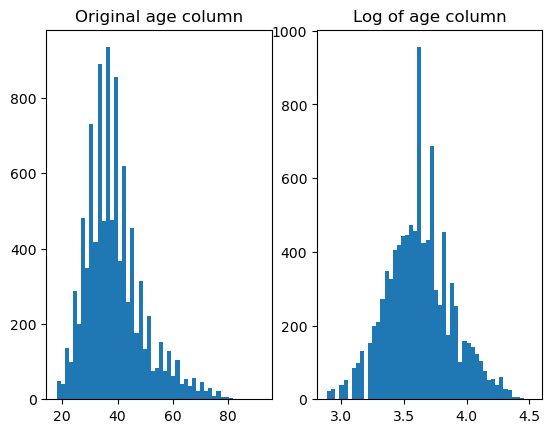

In [23]:
fig, axes = plt.subplots(1, 2)

axes[0].hist(df['age'], bins=50)
axes[0].set_title('Original age column')

axes[1].hist(np.log(df['age']), bins=50)
axes[1].set_title('Log of age column')

plt.show()

In [11]:
df['age_log'] = np.log(df['age'])

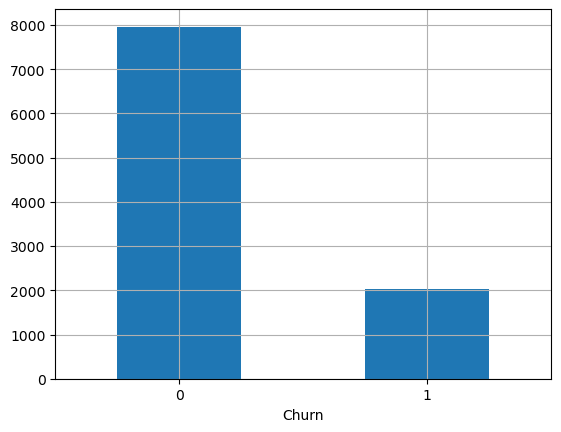

In [12]:
df['churn'].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel('Churn')
plt.show()

In [13]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, stratify=df['churn'], random_state=13)

In [14]:
test_set['churn'].value_counts() / len(test_set)

0    0.7965
1    0.2035
Name: churn, dtype: float64

In [15]:
train_set['churn'].value_counts() / len(train_set)

0    0.79625
1    0.20375
Name: churn, dtype: float64

In [16]:
train_set.corr()['churn'].sort_values(ascending=False)

churn               1.000000
age_log             0.297104
age                 0.290405
balance             0.116868
estimated_salary    0.006000
credit_card        -0.010227
tenure             -0.019395
credit_score       -0.028675
products_number    -0.056592
active_member      -0.151190
Name: churn, dtype: float64

In [17]:
X_train = train_set.drop('churn', axis=1)
y_train = train_set['churn']

In [18]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder

In [20]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import make_column_selector, make_column_transformer

num_pipeline = make_pipeline(RobustScaler())
cat_pipeline = make_pipeline(OneHotEncoder())

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object))
)
